# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Dataset_Clustering.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             13843 non-null  object
 1   Issue               13843 non-null  object
 2   Company             13843 non-null  object
 3   State               13843 non-null  object
 4   Consumer disputed?  13843 non-null  object
 5   Cluster             13843 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 649.0+ KB


,Product,Issue,Company,State,Consumer disputed?,Cluster
0,Mortgage,"Loan servicing, payments, escrow account",PHH Mortgage,FL,No,6
1,Mortgage,"Loan servicing, payments, escrow account",Ocwen,NC,No,6
2,Debt collection,"Loan modification,collection,foreclosure","Southwest Credit Systems, L.P.",MO,No,2
3,Credit card,Billing statement,"Continental Finance Company, LLC",WA,No,3
4,Credit reporting,Unable to get credit report/credit score,Experian,VA,No,0


In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
data_encoded = data.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

In [ ]:
X = data_encoded.drop(columns=["Cluster"])
y = data_encoded["Cluster"]

In [ ]:
data_encoded.info()
data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Product             13843 non-null  int64
 1   Issue               13843 non-null  int64
 2   Company             13843 non-null  int64
 3   State               13843 non-null  int64
 4   Consumer disputed?  13843 non-null  int64
 5   Cluster             13843 non-null  int64
dtypes: int64(6)
memory usage: 649.0 KB


,Product,Issue,Company,State,Consumer disputed?,Cluster
0,6,53,703,9,0,6
1,6,53,684,27,0,6
2,4,52,874,24,0,2
3,2,14,239,47,0,3
4,3,76,341,45,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


Random Forest Accuracy: 0.9971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.99      1.00      0.99        80
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        57
           6       0.99      1.00      0.99       174
           7       0.99      1.00      0.99       189
           8       1.00      0.99      0.99       100
           9       1.00      0.99      0.99       170
          10       1.00      1.00      1.00        69
          11       1.00      1.00      1.00       104
          12       1.00      1.00      1.00       102
          13       1.00      0.98      0.99       117
          14       0.99      1.00      0.99       144
          15       1.00      1.00      1.00        69
          16       1.00      0.99      1.00      

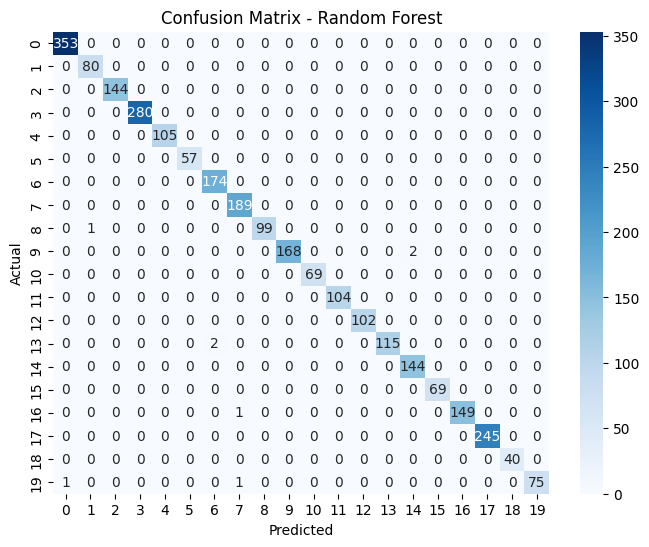


XGBoost Accuracy: 0.9910
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       353
           1       0.98      0.99      0.98        80
           2       1.00      0.99      1.00       144
           3       1.00      0.99      0.99       280
           4       0.99      1.00      1.00       105
           5       0.98      1.00      0.99        57
           6       0.99      0.99      0.99       174
           7       0.99      0.99      0.99       189
           8       0.99      0.98      0.98       100
           9       0.99      0.99      0.99       170
          10       0.97      0.99      0.98        69
          11       1.00      0.98      0.99       104
          12       1.00      0.98      0.99       102
          13       0.99      0.99      0.99       117
          14       0.99      0.99      0.99       144
          15       1.00      1.00      1.00        69
          16       0.98      0.98      0.98       150
 

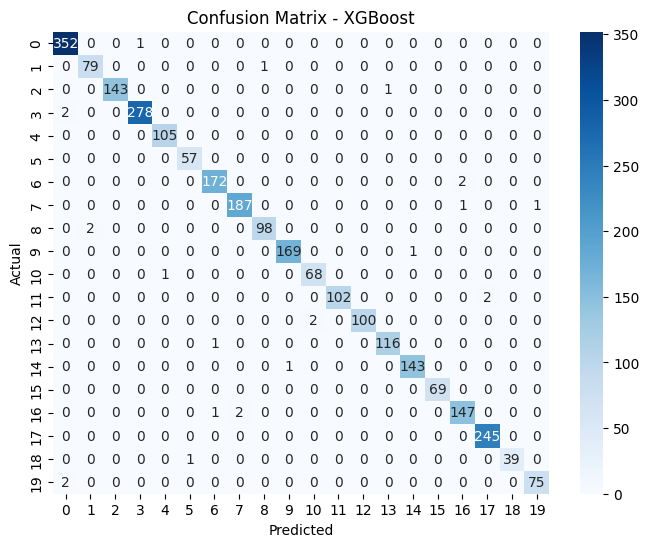

In [ ]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

In [ ]:
print("Random Forest Train Accuracy:", rf_model.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))

print("XGBoost Train Accuracy:", xgb_model.score(X_train, y_train))
print("XGBoost Test Accuracy:", xgb_model.score(X_test, y_test))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.997110870350307
XGBoost Train Accuracy: 0.9990969839263139
XGBoost Test Accuracy: 0.9909714698447093


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
rf_param_grid = {
    "n_estimators": [50, 100, 200, 500],  # Number of trees
    "max_depth": [5, 10, 20, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "bootstrap": [True, False],  # Whether to use bootstrapping
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,  # Number of random iterations
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    random_state=42
)

In [ ]:
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42)

In [ ]:
xgb_param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
}

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [ ]:
xgb_random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42)

In [ ]:
print("Best RF Parameters:", rf_random_search.best_params_)
print("Best XGB Parameters:", xgb_random_search.best_params_)

Best RF Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best XGB Parameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
best_rf = rf_random_search.best_estimator_
rf_test_acc = best_rf.score(X_test, y_test)
print("Tuned RF Test Accuracy:", rf_test_acc)

best_xgb = xgb_random_search.best_estimator_
xgb_test_acc = best_xgb.score(X_test, y_test)
print("Tuned XGB Test Accuracy:", xgb_test_acc)

Tuned RF Test Accuracy: 0.9963885879378838
Tuned XGB Test Accuracy: 0.991332611050921


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Hasil Sebelum Tuning:

*   Random Forest Train Accuracy: 1.0
*   Random Forest Test Accuracy: 0.997110870350307
*   XGBoost Train Accuracy: 0.9990969839263139
*   XGBoost Test Accuracy: 0.9909714698447093

Ketinggian tingkat training dan berarti kedua algoritma mengalami overfit

Hasil Setelah Tuning:

*   Tuned RF Test Accuracy: 0.9963885879378838
*   Tuned XGB Test Accuracy: 0.991332611050921

Kedua algoritma sedikit lebih baik namun masih overfit

Tindakan Lanjutan:


*   Mencoba dengan algoritma lain seperti regresi atau SVM
*   Dengan melakukan Feature Selection dan Regularization

